## Case Study-Banking
### Credit Card Spend Prediction & Identify Drivers for Spend



#### Buisness Problem
One of the global banks would like to understand what factors driving credit card spend are. The bank want to use these insights to calculate credit card limit. In order to solve the problem, the bank conducted survey of 5000 customers and collected data.

The objective of this case study is to understand what's driving the total spend (Primary Card + Secondary card). Given the factors, predict credit limit for the new applicants.



#### Data Availability 
<li> Data for the cases are available in xlsx format.
<li> The data have been provided for 5000 customers.
<li> Detailed data dictionary has been provided for understanding the data in data.
<li> Data is encoded in the numerical format to reduce the size of the data , however some of the variables are categorical. 

#### Statsmodel 
statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct.


#### Variance Inflation Factor
The variance inflation factor is a measure for the increase of the variance of the parameter estimates if an additional variable, given by exog_idx is added to the linear regression. It is a measure for multicollinearity of the design matrix, exog.

One recommendation is that if VIF is greater than 5, then the explanatory variable given by exog_idx is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.

In [123]:
# importing the necessary packages

# the big three (numpy, pandas and matplotlib)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



import seaborn as sns                                   # statistical graphs in python
import pandas_profiling                                 # generates profile report from a pandas dataframe 
from matplotlib.backends.backend_pdf import PdfPages    # using a multipage pdf file using Latex


# used for data analysis
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import warnings
warnings.filterwarnings('ignore')

In [185]:
# importing the data
data = pd.read_excel("Data Set.xlsx")
data

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.10,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.00,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,184.22,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,340.99,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,255.10,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.00,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3675-GZFGOT-QJN,2,2,0,68,6,January,10,1,1,0,24,5,0,196,5.278115,5,8.0,7.934080,2.071167,7.745920,2.047166,0,1,0,-1,-1,1,4,4,0,0,0,0,0,0,1,1,24,4,1,1,0,64.5,3,0,0,5,

#### Cleaning the Data

In [135]:
# understand the data better

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)
data

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.10,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.00,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,184.22,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,340.99,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,255.10,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.00,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3675-GZFGOT-QJN,2,2,0,68,6,January,10,1,1,0,24,5,0,196,5.278115,5,8.0,7.934080,2.071167,7.745920,2.047166,0,1,0,-1,-1,1,4,4,0,0,0,0,0,0,1,1,24,4,1,1,0,64.5,3,0,0,5,

In [31]:
credit_report = pandas_profiling.ProfileReport(data)
credit_report.to_file('credit_report.html')

#### Columns to Remove

We will remove few columns that have no dependence or affect our analysis

like:
CustomerID, Incardmon Missing Incardten,Missing lnequipmon Missing lnequipten Missing lntollmon Missing lntollten Missing lnwiremon Missing lnwireten Missing Address corel age corel cardtenure card2tenure tenure cardtenurecat commute ed lninc lnlongten longten marital spoused

In [186]:
data.drop(["custid","lncardmon","lncardten","lnequipmon","lnequipten","lntollmon","lntollten","lnwiremon","lnwireten","address","age","cardtenure","card2tenure","tenure","cardtenurecat","commute","ed","lninc","lnlongten","longten","marital","spoused"], axis=1, inplace=True)

In [187]:
data.head()

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,retire,income,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,card2,card2type,card2benefit,card2fee,card2tenurecat,cardspent,card2spent,active,bfast,churn,longmon,lnlongmon,tollfree,tollmon,tollten,equip,equipmon,equipten,callcard,cardmon,cardten,wireless,wiremon,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2,1,2,September,3,1,1,0,1,0,31,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,-1,3,0,0,0,0,0,0,0,0,0,2,1,2,1,0,14.3,1,0,0,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,5,3,1,0,2,81.66,67.80,0,3,1,6.50,1.871802,1,29.0,161.05,1,29.50,126.1,1,14.25,60.0,0,0.00,0.00,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,5,5,0,2,May,4,2,0,0,1,0,15,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,-1,2,6,0,0,0,0,0,0,6,1,3,1,2,1,1,6.8,1,0,0,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,1,3,0,2,42.60,34.94,1,1,0,8.90,2.186051,0,0.0,0.00,1,54.85,1975.0,1,16.00,610.0,1,45.65,1683.55,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,3,4,1,6,June,2,2,0,16,5,0,35,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,2,3,3,2,1,0,0,0,0,0,1,1,5,3,1,1,18.8,1,0,1,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,4,1,3,0,5,184.22,175.75,0,3,0,28.40,3.346389,0,0.0,0.00,0,0.00,0.0,1,23.00,1410.0,0,0.00,0.00,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4,3,0,2,May,3,2,0,0,1,0,20,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,4,5,0,0,0,0,0,0,0,0,1,3,2,3,1,1,8.7,1,0,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,3,2,4,0,2,340.99,18.42,1,1,0,6.00,1.791759,0,0.0,0.00,0,0.00,0.0,1,21.00,685.0,0,0.00,0.00,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,2,2,0,3,July,3,2,0,1,1,0,23,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,2,4,0,0,0,0,0,0,0,0,0,2,2,1,0,1,10.6,1,0,1,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,1,3,2,0,3,255.10,252.73,1,3,0,3.05,1.115142,1,16.5,387.70,0,0.00,0.0,1,17.25,360.0,1,19.05,410.80,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0


In [188]:
# chceck the size of the data
data.shape

(5000, 108)

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 108 entries, region to response_03
dtypes: float64(19), int64(88), object(1)
memory usage: 4.1+ MB


In [191]:
# only the townsize column has int64, we will convert it to float64
data['townsize'] = data['townsize'].astype(np.float64)

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 108 entries, region to response_03
dtypes: float64(20), int64(87), object(1)
memory usage: 4.1+ MB


#### Columns and their Datatypes

In [193]:
data.dtypes

region                 int64
townsize             float64
gender                 int64
agecat                 int64
birthmonth            object
edcat                  int64
jobcat                 int64
union                  int64
employ                 int64
empcat                 int64
retire                 int64
income                 int64
inccat                 int64
debtinc              float64
creddebt             float64
lncreddebt           float64
othdebt              float64
lnothdebt            float64
default                int64
jobsat                 int64
spousedcat             int64
reside                 int64
pets                   int64
pets_cats              int64
pets_dogs              int64
pets_birds             int64
pets_reptiles          int64
pets_small             int64
pets_saltfish          int64
pets_freshfish         int64
homeown                int64
hometype               int64
addresscat             int64
cars                   int64
carown        

In [37]:
# creating another credit report to check the co relations and view the statistics
credit_report=pandas_profiling.ProfileReport(data)
credit_report.to_file('credit_report1.html')

In [194]:
# drop another one
data.drop("equipmon",axis = 1, inplace = True)

In [195]:
data.head()

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,retire,income,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,card2,card2type,card2benefit,card2fee,card2tenurecat,cardspent,card2spent,active,bfast,churn,longmon,lnlongmon,tollfree,tollmon,tollten,equip,equipten,callcard,cardmon,cardten,wireless,wiremon,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,2,September,3,1,1,0,1,0,31,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,-1,3,0,0,0,0,0,0,0,0,0,2,1,2,1,0,14.3,1,0,0,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,5,3,1,0,2,81.66,67.80,0,3,1,6.50,1.871802,1,29.0,161.05,1,126.1,1,14.25,60.0,0,0.00,0.00,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,2,May,4,2,0,0,1,0,15,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,-1,2,6,0,0,0,0,0,0,6,1,3,1,2,1,1,6.8,1,0,0,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,1,3,0,2,42.60,34.94,1,1,0,8.90,2.186051,0,0.0,0.00,1,1975.0,1,16.00,610.0,1,45.65,1683.55,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,3,4.0,1,6,June,2,2,0,16,5,0,35,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,2,3,3,2,1,0,0,0,0,0,1,1,5,3,1,1,18.8,1,0,1,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,4,1,3,0,5,184.22,175.75,0,3,0,28.40,3.346389,0,0.0,0.00,0,0.0,1,23.00,1410.0,0,0.00,0.00,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4,3.0,0,2,May,3,2,0,0,1,0,20,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,4,5,0,0,0,0,0,0,0,0,1,3,2,3,1,1,8.7,1,0,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,3,2,4,0,2,340.99,18.42,1,1,0,6.00,1.791759,0,0.0,0.00,0,0.0,1,21.00,685.0,0,0.00,0.00,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,2,2.0,0,3,July,3,2,0,1,1,0,23,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,2,4,0,0,0,0,0,0,0,0,0,2,2,1,0,1,10.6,1,0,1,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,1,3,2,0,3,255.10,252.73,1,3,0,3.05,1.115142,1,16.5,387.70,0,0.0,1,17.25,360.0,1,19.05,410.80,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0


In [196]:
data.shape

(5000, 107)

In [197]:
data.cardspent

0        81.66
1        42.60
2       184.22
3       340.99
4       255.10
         ...  
4995    872.11
4996    210.81
4997    884.08
4998    381.35
4999    269.72
Name: cardspent, Length: 5000, dtype: float64

In [198]:
# dropping the duplicate values
data.drop_duplicates(inplace= True)

In [199]:
# mentioning the attributes we need
to_convert=[
"card2tenurecat",
"cars",
"commutecat", 
"edcat",
"empcat", 
"inccat",
"internet", 
"jobcat", 
"jobsat", 
"pets_birds", 
"pets_dogs", 
"pets_cats", 
"pets_freshfish", 
"pets_reptiles", 
"pets_saltfish",
"pets_small",
"polview",
"reason",
"region",
"reside",
"spousedcat",
"townsize"]

In [200]:
cat_var=["active",
"bfast",
"birthmonth",
"callcard",
"callid",
"callwait",
"carbought",
"carbuy",
"carcatvalue",
"card",
"card2",
"card2benefit",
"card2fee",
"card2tenurecat",
"card2type",
"cardbenefit",
"cardfee",
"cardtype",
"carown",
"cars",
"cartype",
"churn",
"commutebike",
"commutebus",
"commutecar",
"commutecarpool",
"commutecat",
"commutemotorcycle",
"commutenonmotor",
"commutepublic",
"commuterail",
"commutewalk",
"confer",
"default",
"ebill",
"edcat",
"empcat",
"forward",
"gender",
"homeown",
"hometype",
"inccat",
"internet",
"jobcat",
"jobsat",
"multline",
"news",
"owncd",
"owndvd",
"ownfax",
"owngame",
"ownipod",
"ownpc",
"ownpda",
"owntv",
"ownvcr",
"pager",
"pets_birds",
"pets_dogs",
"pets_cats",
"pets_freshfish",
"pets_reptiles",
"pets_saltfish",
"pets_small",
"polcontrib",
"polparty",
"polview",
"reason",
"region",
"reside",
"response_01", 
"response_02",
"response_03",
"retire",
"spousedcat",
"telecommute",
"tollfree",
"townsize",
"union",
"voice",
"vote",
"addresscat",
"agecat", 
"wireless",
"equip"]

We separate/divide the data to clean it more efficiently

In [201]:
# making the categorical data set
data_cat = data[cat_var]

In [202]:
data_cat


,active,bfast,birthmonth,callcard,callid,callwait,carbought,carbuy,carcatvalue,card,card2,card2benefit,card2fee,card2tenurecat,card2type,cardbenefit,cardfee,cardtype,carown,cars,cartype,churn,commutebike,commutebus,commutecar,commutecarpool,commutecat,commutemotorcycle,commutenonmotor,commutepublic,commuterail,commutewalk,confer,default,ebill,edcat,empcat,forward,gender,homeown,hometype,inccat,internet,jobcat,jobsat,multline,news,owncd,owndvd,ownfax,owngame,ownipod,ownpc,ownpda,owntv,ownvcr,pager,pets_birds,pets_dogs,pets_cats,pets_freshfish,pets_reptiles,pets_saltfish,pets_small,polcontrib,polparty,polview,reason,region,reside,response_01,response_02,response_03,retire,spousedcat,telecommute,tollfree,townsize,union,voice,vote,addresscat,agecat,wireless,equip
0,0,3,September,1,0,1,0,0,1,3,5,1,0,2,3,1,0,1,1,2,0,1,0,0,0,1,4,1,0,0,0,1,1,1,0,3,1,1,1,0,2,2,0,1,1,1,0,0,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,6,9,1,3,0,1,0,0,-1,0,1,2.0,1,1,1,1,2,0,1
1,1,1,May,1,1,0,0,0,1,2,4,3,0,2,1,1,0,4,1,2,1,0,1,1,1,0,1,0,1,0,0,0,0,1,1,4,1,1,0,1,3,1,4,2,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,6,0,0,0,0,1,4,9,5,2,0,0,0,0,-1,1,0,5.0,0,1,0,1,2,1,1
2,0,3,June,1,0,0,0,1,1,2,4,3,0,5,1,4,0,1,1,3,1,0,0,1,1,1,3,0,0,0,1,0,0,0,0,2,5,0,1,1,1,2,0,2,4,1,1,1,1,0,0,0,0,0,1,1,0,0,1,2,0,0,0,0,0,1,5,2,3,3,0,0,0,0,2,0,0,4.0,0,0,0,5,6,0,0
3,1,1,May,1,0,0,0,1,1,2,3,4,0,2,2,4,0,1,1,3,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,3,1,0,0,1,3,1,2,2,2,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,3,9,4,5,1,0,0,0,4,0,0,3.0,0,0,0,2,2,0,0
4,1,3,July,1,1,1,0,1,1,4,1,2,0,3,3,1,0,2,0,1,1,0,0,0,0,0,3,0,0,1,0,1,1,0,0,3,1,1,0,0,2,1,3,2,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,4,9,2,4,0,1,0,0,2,0,1,2.0,0,1,0,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,2,January,1,0,0,0,0,3,1,3,4,0,5,3,3,0,3,1,1,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,1,5,0,0,1,1,5,0,1,1,0,1,1,1,0,0,0,0,0,1,1,0,0,0,4,0,0,0,0,1,0,4,9,2,1,0,0,0,0,-1,0,0,2.0,0,0,1,4,6,0,0
4996,1,1,May,1,1,1,1,1,3,3,5,2,0,4,1,4,0,4,1,2,1,0,0,1,1,0,3,0,0,1,0,0,1,1,0,2,3,1,0,1,1,4,0,1,5,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,4,9,3,1,0,0,0,0,-1,0,1,3.0,0,0,0,3,5,1,0
4997,0,3,August,1,1,1,1,0,3,1,2,4,0,5,4,1,0,3,1,3,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,4,5,1,0,1,3,4,0,1,3,1,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,4,9,4,1,0,0,0,0,-1,0,1,5.0,0,0,0,5,6,0,0
4998,0,3,December,1,0,0,1,1,3,3,4,1,0,4,3,1,0,1,1,2,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,4,2,0,0,1,1,5,3,2,4,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,2,9,1,4,0,0,0,0,3,0,0,1.0,0,0,0,4,4,0,1


In [203]:
# making the rest of data the numerical one
data_num = data[data.columns.difference(cat_var)]
data_num

,card2spent,cardmon,cardspent,cardten,carvalue,commutetime,creddebt,debtinc,employ,equipten,hourstv,income,lncreddebt,lnlongmon,lnothdebt,longmon,othdebt,pets,tollmon,tollten,wiremon,wireten
0,67.80,14.25,81.66,60.0,14.3,22.0,1.200909,11.1,0,126.10,13,31,0.183079,1.871802,0.806516,6.50,2.240091,0,29.0,161.05,0.00,0.00
1,34.94,16.00,42.60,610.0,6.8,29.0,1.222020,18.6,0,1975.00,18,15,0.200505,2.186051,0.449788,8.90,1.567980,6,0.0,0.00,45.65,1683.55
2,175.75,23.00,184.22,1410.0,18.8,24.0,0.928620,9.9,16,0.00,21,35,-0.074056,3.346389,0.930738,28.40,2.536380,3,0.0,0.00,0.00,0.00
3,18.42,21.00,340.99,685.0,8.7,38.0,0.022800,5.7,0,0.00,26,20,-3.780995,1.791759,0.110826,6.00,1.117200,0,0.0,0.00,0.00,0.00
4,252.73,17.25,255.10,360.0,10.6,32.0,0.214659,1.7,1,0.00,27,23,-1.538705,1.115142,-1.735336,3.05,0.176341,0,16.5,387.70,19.05,410.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,553.56,21.75,872.11,1565.0,64.5,21.0,7.934080,8.0,24,0.00,19,196,2.071167,3.529297,2.047166,34.10,7.745920,4,0.0,0.00,0.00,0.00
4996,155.54,26.25,210.81,800.0,40.0,26.0,3.336600,15.0,6,0.00,14,83,1.204952,2.341806,2.209746,10.40,9.113400,1,36.5,1157.20,27.90,757.35
4997,643.67,15.25,884.08,1070.0,53.6,32.0,3.557520,10.8,24,0.00,16,108,1.269064,3.380995,2.092664,29.40,8.106480,0,44.0,3322.50,0.00,0.00
4998,371.60,9.50,381.35,345.0,96.0,12.0,5.021352,10.8,3,1032.85,24,189,1.613699,2.073172,2.733760,7.95,15.390648,0,0.0,0.00,0.00,0.00


In [204]:
# making every attribute an object
data_cat[to_convert] = data_cat[to_convert].astype(object)

In [205]:
# checking the data type
data_cat[to_convert].dtypes

card2tenurecat    object
cars              object
commutecat        object
edcat             object
empcat            object
inccat            object
internet          object
jobcat            object
jobsat            object
pets_birds        object
pets_dogs         object
pets_cats         object
pets_freshfish    object
pets_reptiles     object
pets_saltfish     object
pets_small        object
polview           object
reason            object
region            object
reside            object
spousedcat        object
townsize          object
dtype: object

In [153]:
data_cat

,active,bfast,birthmonth,callcard,callid,callwait,carbought,carbuy,carcatvalue,card,card2,card2benefit,card2fee,card2tenurecat,card2type,cardbenefit,cardfee,cardtype,carown,cars,cartype,churn,commutebike,commutebus,commutecar,commutecarpool,commutecat,commutemotorcycle,commutenonmotor,commutepublic,commuterail,commutewalk,confer,default,ebill,edcat,empcat,forward,gender,homeown,hometype,inccat,internet,jobcat,jobsat,multline,news,owncd,owndvd,ownfax,owngame,ownipod,ownpc,ownpda,owntv,ownvcr,pager,pets_birds,pets_dogs,pets_cats,pets_freshfish,pets_reptiles,pets_saltfish,pets_small,polcontrib,polparty,polview,reason,region,reside,response_01,response_02,response_03,retire,spousedcat,telecommute,tollfree,townsize,union,voice,vote,addresscat,agecat,wireless,equip
0,0,3,September,1,0,1,0,0,1,3,5,1,0,2,3,1,0,1,1,2,0,1,0,0,0,1,4,1,0,0,0,1,1,1,0,3,1,1,1,0,2,2,0,1,1,1,0,0,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,6,9,1,3,0,1,0,0,-1,0,1,2,1,1,1,1,2,0,1
1,1,1,May,1,1,0,0,0,1,2,4,3,0,2,1,1,0,4,1,2,1,0,1,1,1,0,1,0,1,0,0,0,0,1,1,4,1,1,0,1,3,1,4,2,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,6,0,0,0,0,1,4,9,5,2,0,0,0,0,-1,1,0,5,0,1,0,1,2,1,1
2,0,3,June,1,0,0,0,1,1,2,4,3,0,5,1,4,0,1,1,3,1,0,0,1,1,1,3,0,0,0,1,0,0,0,0,2,5,0,1,1,1,2,0,2,4,1,1,1,1,0,0,0,0,0,1,1,0,0,1,2,0,0,0,0,0,1,5,2,3,3,0,0,0,0,2,0,0,4,0,0,0,5,6,0,0
3,1,1,May,1,0,0,0,1,1,2,3,4,0,2,2,4,0,1,1,3,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,3,1,0,0,1,3,1,2,2,2,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,3,9,4,5,1,0,0,0,4,0,0,3,0,0,0,2,2,0,0
4,1,3,July,1,1,1,0,1,1,4,1,2,0,3,3,1,0,2,0,1,1,0,0,0,0,0,3,0,0,1,0,1,1,0,0,3,1,1,0,0,2,1,3,2,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,4,9,2,4,0,1,0,0,2,0,1,2,0,1,0,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,2,January,1,0,0,0,0,3,1,3,4,0,5,3,3,0,3,1,1,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,1,5,0,0,1,1,5,0,1,1,0,1,1,1,0,0,0,0,0,1,1,0,0,0,4,0,0,0,0,1,0,4,9,2,1,0,0,0,0,-1,0,0,2,0,0,1,4,6,0,0
4996,1,1,May,1,1,1,1,1,3,3,5,2,0,4,1,4,0,4,1,2,1,0,0,1,1,0,3,0,0,1,0,0,1,1,0,2,3,1,0,1,1,4,0,1,5,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,4,9,3,1,0,0,0,0,-1,0,1,3,0,0,0,3,5,1,0
4997,0,3,August,1,1,1,1,0,3,1,2,4,0,5,4,1,0,3,1,3,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,4,5,1,0,1,3,4,0,1,3,1,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,4,9,4,1,0,0,0,0,-1,0,1,5,0,0,0,5,6,0,0
4998,0,3,December,1,0,0,1,1,3,3,4,1,0,4,3,1,0,1,1,2,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,4,2,0,0,1,1,5,3,2,4,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,2,9,1,4,0,0,0,0,3,0,0,1,0,0,0,4,4,0,1


In [206]:
data_cat = data_cat.astype(object)

In [155]:
data_num

,card2spent,cardmon,cardspent,cardten,carvalue,commutetime,creddebt,debtinc,employ,equipten,hourstv,income,lncreddebt,lnlongmon,lnothdebt,longmon,othdebt,pets,tollmon,tollten,wiremon,wireten
0,67.80,14.25,81.66,60.0,14.3,22.0,1.200909,11.1,0,126.10,13,31,0.183079,1.871802,0.806516,6.50,2.240091,0,29.0,161.05,0.00,0.00
1,34.94,16.00,42.60,610.0,6.8,29.0,1.222020,18.6,0,1975.00,18,15,0.200505,2.186051,0.449788,8.90,1.567980,6,0.0,0.00,45.65,1683.55
2,175.75,23.00,184.22,1410.0,18.8,24.0,0.928620,9.9,16,0.00,21,35,-0.074056,3.346389,0.930738,28.40,2.536380,3,0.0,0.00,0.00,0.00
3,18.42,21.00,340.99,685.0,8.7,38.0,0.022800,5.7,0,0.00,26,20,-3.780995,1.791759,0.110826,6.00,1.117200,0,0.0,0.00,0.00,0.00
4,252.73,17.25,255.10,360.0,10.6,32.0,0.214659,1.7,1,0.00,27,23,-1.538705,1.115142,-1.735336,3.05,0.176341,0,16.5,387.70,19.05,410.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,553.56,21.75,872.11,1565.0,64.5,21.0,7.934080,8.0,24,0.00,19,196,2.071167,3.529297,2.047166,34.10,7.745920,4,0.0,0.00,0.00,0.00
4996,155.54,26.25,210.81,800.0,40.0,26.0,3.336600,15.0,6,0.00,14,83,1.204952,2.341806,2.209746,10.40,9.113400,1,36.5,1157.20,27.90,757.35
4997,643.67,15.25,884.08,1070.0,53.6,32.0,3.557520,10.8,24,0.00,16,108,1.269064,3.380995,2.092664,29.40,8.106480,0,44.0,3322.50,0.00,0.00
4998,371.60,9.50,381.35,345.0,96.0,12.0,5.021352,10.8,3,1032.85,24,189,1.613699,2.073172,2.733760,7.95,15.390648,0,0.0,0.00,0.00,0.00


In [156]:
data_cat[to_convert]

,card2tenurecat,cars,commutecat,edcat,empcat,inccat,internet,jobcat,jobsat,pets_birds,pets_dogs,pets_cats,pets_freshfish,pets_reptiles,pets_saltfish,pets_small,polview,reason,region,reside,spousedcat,townsize
0,2,2,4,3,1,2,0,1,1,0,0,0,0,0,0,0,6,9,1,3,-1,2
1,2,2,1,4,1,1,4,2,1,0,0,0,6,0,0,0,4,9,5,2,-1,5
2,5,3,3,2,5,2,0,2,4,0,1,2,0,0,0,0,5,2,3,3,2,4
3,2,3,1,3,1,1,2,2,2,0,0,0,0,0,0,0,3,9,4,5,4,3
4,3,1,3,3,1,1,3,2,1,0,0,0,0,0,0,0,4,9,2,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5,1,3,1,5,5,0,1,1,0,0,4,0,0,0,0,4,9,2,1,-1,2
4996,4,2,3,2,3,4,0,1,5,0,0,0,1,0,0,0,4,9,3,1,-1,3
4997,5,3,1,4,5,4,0,1,3,0,0,0,0,0,0,0,4,9,4,1,-1,5
4998,4,2,1,4,2,5,3,2,4,0,0,0,0,0,0,0,2,9,1,4,3,1


In [207]:
# replace the missing element with the median of that column
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x
data_num = data_num.apply(lambda x: Missing_imputation(x))

In [208]:
# capping the outlier
def outlier_capping(x):
    x = x.clip(upper = x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.01))
    return x
data_num = data_num.apply(outlier_capping)
    

In [159]:
data_num

,card2spent,cardmon,cardspent,cardten,carvalue,commutetime,creddebt,debtinc,employ,equipten,hourstv,income,lncreddebt,lnlongmon,lnothdebt,longmon,othdebt,pets,tollmon,tollten,wiremon,wireten
0,67.80,14.25,81.66,60.0,14.300,22.0,1.200909,11.1,0,126.10,13,31.0,0.183079,1.871802,0.806516,6.50,2.240091,0,29.0,161.05,0.00,0.00
1,34.94,16.00,42.60,610.0,6.800,29.0,1.222020,18.6,0,1975.00,18,15.0,0.200505,2.186051,0.449788,8.90,1.567980,6,0.0,0.00,45.65,1683.55
2,175.75,23.00,184.22,1410.0,18.800,24.0,0.928620,9.9,16,0.00,21,35.0,-0.074056,3.346389,0.930738,28.40,2.536380,3,0.0,0.00,0.00,0.00
3,18.42,21.00,340.99,685.0,8.700,38.0,0.033160,5.7,0,0.00,26,20.0,-3.401644,1.791759,0.110826,6.00,1.117200,0,0.0,0.00,0.00,0.00
4,252.73,17.25,255.10,360.0,10.600,32.0,0.214659,1.7,1,0.00,27,23.0,-1.538705,1.115142,-1.735336,3.05,0.176341,0,16.5,387.70,19.05,410.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,553.56,21.75,872.11,1565.0,64.500,21.0,7.934080,8.0,24,0.00,19,196.0,2.071167,3.529297,2.047166,34.10,7.745920,4,0.0,0.00,0.00,0.00
4996,155.54,26.25,210.81,800.0,40.000,26.0,3.336600,15.0,6,0.00,14,83.0,1.204952,2.341806,2.209746,10.40,9.113400,1,36.5,1157.20,27.90,757.35
4997,643.67,15.25,884.08,1070.0,53.600,32.0,3.557520,10.8,24,0.00,16,108.0,1.269064,3.380995,2.092664,29.40,8.106480,0,44.0,3322.50,0.00,0.00
4998,371.60,9.50,381.35,345.0,92.001,13.0,5.021352,10.8,3,1032.85,24,189.0,1.613699,2.073172,2.733760,7.95,15.390648,0,0.0,0.00,0.00,0.00


In [209]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 85 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   active             5000 non-null   object
 1   bfast              5000 non-null   object
 2   birthmonth         5000 non-null   object
 3   callcard           5000 non-null   object
 4   callid             5000 non-null   object
 5   callwait           5000 non-null   object
 6   carbought          5000 non-null   object
 7   carbuy             5000 non-null   object
 8   carcatvalue        5000 non-null   object
 9   card               5000 non-null   object
 10  card2              5000 non-null   object
 11  card2benefit       5000 non-null   object
 12  card2fee           5000 non-null   object
 13  card2tenurecat     5000 non-null   object
 14  card2type          5000 non-null   object
 15  cardbenefit        5000 non-null   object
 16  cardfee            5000 non-null   object


In [210]:
# replacing the townsize columns empty element with the mode of that column
data_cat.townsize.fillna(data_cat.townsize.mode(),inplace=True)

In [211]:
# checking the unique values
data_cat.townsize.unique()

array([2., 5., 4., 3., 1.])

In [180]:
#data_cat['townsize'] = data_cat['townsize'].astype(np.float64)

In [212]:
data_cat[~data_cat.townsize.isin([1,2,3,4,5])].townsize

Series([], Name: townsize, dtype: float64)

In [213]:
# checking the mode of the townsize column
data_cat.townsize.mode()

0    1.0
dtype: float64

In [214]:
# replacing the 961th and 2731th line with mode
data_cat.townsize.iloc[961]=1
data_cat.townsize.iloc[2731]=1


In [216]:
# converting it to object
data_cat.townsize=data_cat.townsize.astype(object)

In [217]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 85 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   active             5000 non-null   object
 1   bfast              5000 non-null   object
 2   birthmonth         5000 non-null   object
 3   callcard           5000 non-null   object
 4   callid             5000 non-null   object
 5   callwait           5000 non-null   object
 6   carbought          5000 non-null   object
 7   carbuy             5000 non-null   object
 8   carcatvalue        5000 non-null   object
 9   card               5000 non-null   object
 10  card2              5000 non-null   object
 11  card2benefit       5000 non-null   object
 12  card2fee           5000 non-null   object
 13  card2tenurecat     5000 non-null   object
 14  card2type          5000 non-null   object
 15  cardbenefit        5000 non-null   object
 16  cardfee            5000 non-null   object


In [218]:
data_cat = pd.get_dummies(data_cat, drop_first=True)
data_cat


,active_1,bfast_2,bfast_3,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,callcard_1,callid_1,callwait_1,carbought_0,carbought_1,carbuy_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,card_2,card_3,card_4,card_5,card2_2,card2_3,card2_4,card2_5,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_1,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,card2type_2,card2type_3,card2type_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_1,cardtype_2,cardtype_3,cardtype_4,carown_0,carown_1,cars_1,cars_2,cars_3,cars_4,cars_5,cars_6,cars_7,cars_8,cartype_0,cartype_1,churn_1,commutebike_1,commutebus_1,commutecar_1,commutecarpool_1,commutecat_2,commutecat_3,commutecat_4,commutecat_5,commutemotorcycle_1,commutenonmotor_1,commutepublic_1,commuterail_1,commutewalk_1,confer_1,default_1,ebill_1,edcat_2,edcat_3,edcat_4,edcat_5,empcat_2,empcat_3,empcat_4,empcat_5,forward_1,gender_1,homeown_1,hometype_2,hometype_3,hometype_4,inccat_2,inccat_3,inccat_4,inccat_5,internet_1,internet_2,internet_3,internet_4,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,jobsat_2,jobsat_3,jobsat_4,jobsat_5,multline_1,news_1,owncd_1,owndvd_1,ownfax_1,owngame_1,ownipod_1,ownpc_1,ownpda_1,owntv_1,ownvcr_1,pager_1,pets_birds_1,pets_birds_2,pets_birds_3,pets_birds_4,pets_birds_5,pets_dogs_1,pets_dogs_2,pets_dogs_3,pets_dogs_4,pets_dogs_5,pets_dogs_7,pets_cats_1,pets_cats_2,pets_cats_3,pets_cats_4,pets_cats_5,pets_cats_6,pets_freshfish_1,pets_freshfish_2,pets_freshfish_3,pets_freshfish_4,pets_freshfish_5,pets_freshfish_6,pets_freshfish_7,pets_freshfish_8,pets_freshfish_9,pets_freshfish_10,pets_freshfish_11,pets_freshfish_12,pets_freshfish_13,pets_freshfish_14,pets_freshfish_15,pets_freshfish_16,pets_reptiles_1,pets_reptiles_2,pets_reptiles_3,pets_reptiles_4,pets_reptiles_5,pets_reptiles_6,pets_saltfish_1,pets_saltfish_2,pets_saltfish_3,pets_saltfish_4,pets_saltfish_5,pets_saltfish_6,pets_saltfish_7,pets_saltfish_8,pets_small_1,pets_small_2,pets_small_3,pets_small_4,pets_small_5,pets_small_6,pets_small_7,polcontrib_1,polparty_1,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,reason_2,reason_3,reason_4,reason_9,region_2,region_3,region_4,region_5,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8,reside_9,response_01_1,response_02_1,response_03_1,retire_1,spousedcat_1,spousedcat_2,spousedcat_3,spousedcat_4,spousedcat_5,telecommute_1,tollfree_1,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,union_1,voice_1,vote_1,addresscat_2,addresscat_3,addresscat_4,addresscat_5,agecat_3,agecat_4,agecat_5,agecat_6,wireless_1,equip_1
0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1
2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1

In [219]:
# combinig the numerical and the categorical data to make the final data
data_final = pd.concat([data_num, data_cat], axis = 1)
data_final

,card2spent,cardmon,cardspent,cardten,carvalue,commutetime,creddebt,debtinc,employ,equipten,hourstv,income,lncreddebt,lnlongmon,lnothdebt,longmon,othdebt,pets,tollmon,tollten,wiremon,wireten,active_1,bfast_2,bfast_3,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,callcard_1,callid_1,callwait_1,carbought_0,carbought_1,carbuy_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,card_2,card_3,card_4,card_5,card2_2,card2_3,card2_4,card2_5,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_1,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,card2type_2,card2type_3,card2type_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_1,cardtype_2,cardtype_3,cardtype_4,carown_0,carown_1,cars_1,cars_2,cars_3,cars_4,cars_5,cars_6,cars_7,cars_8,cartype_0,cartype_1,churn_1,commutebike_1,commutebus_1,commutecar_1,commutecarpool_1,commutecat_2,commutecat_3,commutecat_4,commutecat_5,commutemotorcycle_1,commutenonmotor_1,commutepublic_1,commuterail_1,commutewalk_1,confer_1,default_1,ebill_1,edcat_2,edcat_3,edcat_4,edcat_5,empcat_2,empcat_3,empcat_4,empcat_5,forward_1,gender_1,homeown_1,hometype_2,hometype_3,hometype_4,inccat_2,inccat_3,inccat_4,inccat_5,internet_1,internet_2,internet_3,internet_4,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,jobsat_2,jobsat_3,jobsat_4,jobsat_5,multline_1,news_1,owncd_1,owndvd_1,ownfax_1,owngame_1,ownipod_1,ownpc_1,ownpda_1,owntv_1,ownvcr_1,pager_1,pets_birds_1,pets_birds_2,pets_birds_3,pets_birds_4,pets_birds_5,pets_dogs_1,pets_dogs_2,pets_dogs_3,pets_dogs_4,pets_dogs_5,pets_dogs_7,pets_cats_1,pets_cats_2,pets_cats_3,pets_cats_4,pets_cats_5,pets_cats_6,pets_freshfish_1,pets_freshfish_2,pets_freshfish_3,pets_freshfish_4,pets_freshfish_5,pets_freshfish_6,pets_freshfish_7,pets_freshfish_8,pets_freshfish_9,pets_freshfish_10,pets_freshfish_11,pets_freshfish_12,pets_freshfish_13,pets_freshfish_14,pets_freshfish_15,pets_freshfish_16,pets_reptiles_1,pets_reptiles_2,pets_reptiles_3,pets_reptiles_4,pets_reptiles_5,pets_reptiles_6,pets_saltfish_1,pets_saltfish_2,pets_saltfish_3,pets_saltfish_4,pets_saltfish_5,pets_saltfish_6,pets_saltfish_7,pets_saltfish_8,pets_small_1,pets_small_2,pets_small_3,pets_small_4,pets_small_5,pets_small_6,pets_small_7,polcontrib_1,polparty_1,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,reason_2,reason_3,reason_4,reason_9,region_2,region_3,region_4,region_5,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8,reside_9,response_01_1,response_02_1,response_03_1,retire_1,spousedcat_1,spousedcat_2,spousedcat_3,spousedcat_4,spousedcat_5,telecommute_1,tollfree_1,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,union_1,voice_1,vote_1,addresscat_2,addresscat_3,addresscat_4,addresscat_5,agecat_3,agecat_4,agecat_5,agecat_6,wireless_1,equip_1
0,67.80,14.25,81.66,60.0,14.300,22.0,1.200909,11.1,0,126.10,13,31.0,0.183079,1.871802,0.806516,6.50,2.240091,0,29.0,161.05,0.00,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1
1,34.94,16.00,42.60,610.0,6.800,29.0,1.222020,18.6,0,1975.00,18,15.0,0.200505,2.186051,0.449788,8.90,1.567980,6,0.0,0.00,45.65,1683.55,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0

In [220]:
# checking the ln(cred to debt ratio) column
data_final.lncreddebt

0       0.183079
1       0.200505
2      -0.074056
3      -3.401644
4      -1.538705
          ...   
4995    2.071167
4996    1.204952
4997    1.269064
4998    1.613699
4999    0.818744
Name: lncreddebt, Length: 5000, dtype: float64

In [221]:
# calculating CV for all variables

cv_vars = data_final.apply(lambda x: np.mean(x)/np.std(x))

In [222]:
# saving the cv to a csv file
cv_vars.to_csv('cv.csv')

In [223]:
# all the attributes to delete that have no importance in our data, because they have CV<0.5
to_delete=[
"lncreddebt",
"cars_8",
"pets_reptiles_5",
"pets_dogs_7",
"pets_birds_5",
"pets_saltfish_8",
"pets_freshfish_16",
"pets_reptiles_6",
"pets_reptiles_4",
"pets_small_7",
"pets_cats_6",
"reside_9",
"pets_saltfish_7",
"pets_saltfish_1",
"pets_small_6",
"pets_freshfish_13",
"pets_dogs_5",
"pets_freshfish_14",
"pets_cats_5",
"pets_freshfish_15",
"reside_8",
"pets_saltfish_5",
"pets_saltfish_4",
"pets_small_5",
"pets_saltfish_6",
"pets_saltfish_2",
"pets_saltfish_3",
"cars_7"]

In [224]:
# dropping the variables with low variation (CV<0.5)


data_final.drop(to_delete,axis=1, inplace=True)

In [225]:
data_final

,card2spent,cardmon,cardspent,cardten,carvalue,commutetime,creddebt,debtinc,employ,equipten,hourstv,income,lnlongmon,lnothdebt,longmon,othdebt,pets,tollmon,tollten,wiremon,wireten,active_1,bfast_2,bfast_3,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,callcard_1,callid_1,callwait_1,carbought_0,carbought_1,carbuy_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,card_2,card_3,card_4,card_5,card2_2,card2_3,card2_4,card2_5,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_1,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,card2type_2,card2type_3,card2type_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_1,cardtype_2,cardtype_3,cardtype_4,carown_0,carown_1,cars_1,cars_2,cars_3,cars_4,cars_5,cars_6,cartype_0,cartype_1,churn_1,commutebike_1,commutebus_1,commutecar_1,commutecarpool_1,commutecat_2,commutecat_3,commutecat_4,commutecat_5,commutemotorcycle_1,commutenonmotor_1,commutepublic_1,commuterail_1,commutewalk_1,confer_1,default_1,ebill_1,edcat_2,edcat_3,edcat_4,edcat_5,empcat_2,empcat_3,empcat_4,empcat_5,forward_1,gender_1,homeown_1,hometype_2,hometype_3,hometype_4,inccat_2,inccat_3,inccat_4,inccat_5,internet_1,internet_2,internet_3,internet_4,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,jobsat_2,jobsat_3,jobsat_4,jobsat_5,multline_1,news_1,owncd_1,owndvd_1,ownfax_1,owngame_1,ownipod_1,ownpc_1,ownpda_1,owntv_1,ownvcr_1,pager_1,pets_birds_1,pets_birds_2,pets_birds_3,pets_birds_4,pets_dogs_1,pets_dogs_2,pets_dogs_3,pets_dogs_4,pets_cats_1,pets_cats_2,pets_cats_3,pets_cats_4,pets_freshfish_1,pets_freshfish_2,pets_freshfish_3,pets_freshfish_4,pets_freshfish_5,pets_freshfish_6,pets_freshfish_7,pets_freshfish_8,pets_freshfish_9,pets_freshfish_10,pets_freshfish_11,pets_freshfish_12,pets_reptiles_1,pets_reptiles_2,pets_reptiles_3,pets_small_1,pets_small_2,pets_small_3,pets_small_4,polcontrib_1,polparty_1,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,reason_2,reason_3,reason_4,reason_9,region_2,region_3,region_4,region_5,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,response_01_1,response_02_1,response_03_1,retire_1,spousedcat_1,spousedcat_2,spousedcat_3,spousedcat_4,spousedcat_5,telecommute_1,tollfree_1,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,union_1,voice_1,vote_1,addresscat_2,addresscat_3,addresscat_4,addresscat_5,agecat_3,agecat_4,agecat_5,agecat_6,wireless_1,equip_1
0,67.80,14.25,81.66,60.0,14.300,22.0,1.200909,11.1,0,126.10,13,31.0,1.871802,0.806516,6.50,2.240091,0,29.0,161.05,0.00,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1
1,34.94,16.00,42.60,610.0,6.800,29.0,1.222020,18.6,0,1975.00,18,15.0,2.186051,0.449788,8.90,1.567980,6,0.0,0.00,45.65,1683.55,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1
2,175.75,23.00,184.22,1410.0,18.800,24.0,0.928620,9.9,16,0.00,21,35.0,3.346389,0.930738,28.40,2.536380,3,0.0,0.00,0.00,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,

In [226]:
data_final.shape

(5000, 221)

#### Normality Checking

<AxesSubplot:>

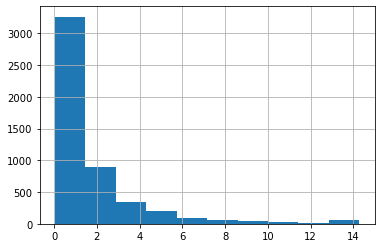

In [227]:
# checking the distribution of Credit Amount
# target variable follows an Exponential Distribution
data_final.creddebt.hist()

<AxesSubplot:>

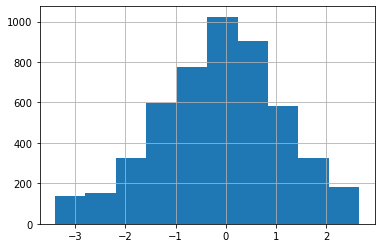

In [228]:
# apllying a transformation to make it normal
data_final['In_creddebt'] = np.log(data_final.creddebt)

data_final.In_creddebt.hist()

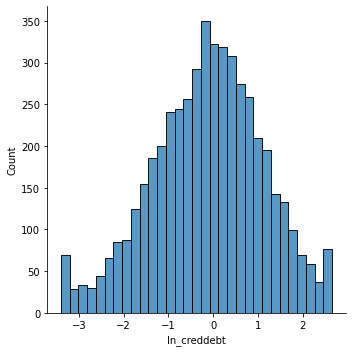

In [229]:
sns.displot(data_final.In_creddebt)

In [230]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Columns: 222 entries, card2spent to In_creddebt
dtypes: float64(19), int64(3), uint8(200)
memory usage: 1.8 MB


### Variable Reduction

In [231]:
# using the linearity assumption
# make a csv showing the coorelation among the attributes

corr_mat = data_final.corr()
corr_mat.to_csv('corr_mat.csv')

In [232]:
corr_list=[
"spousedcat_5",
"response_03_1",
"jobsat_2",
"empcat_2",
"news_1",
"callid_1",
"tollfree_1",
"agecat_3",
"agecat_6",
"edcat_5",
"card_5",
"cardmon",
"ownfax_1",
"card2_5",
"vote_1",
"hometype_2",
"confer_1",
"forward_1",
"inccat_2",
"pager_1",
"card_2",
"callwait_1",
"edcat_4",
"longmon",
"cardten",
"card2tenurecat_2",
"homeown_1",
"callcard_1",
"card_4",
"wireless_1",
"voice_1",
"empcat_4",
"ownpda_1",
"addresscat_2",
"agecat_4",
"lnlongmon",
"multline_1",
"equipten",
"tollmon",
"card2tenurecat_5",
"wiremon",
"owntv_1",
"jobcat_2",
"empcat_5",
"jobsat_5",
"tollten",
"addresscat_4",
"wireten",
"inccat_3",
"carcatvalue_2",
"carown_1",
"employ",
"agecat_5",
"default_1",
"owncd_1",
"ownvcr_1",
"carown_0",
"owndvd_1",
"card2spent",
"retire_1",
"cardspent",
"inccat_4",
"inccat_5",
"carcatvalue_3",
"carcatvalue_1",
"carvalue",
"income",
"debtinc",
"othdebt",
"lnothdebt"]

In [233]:
# selecting features
features = data_final[data_final.columns.difference(['In_creddebt','creddebt'])]
target = data_final['In_creddebt']

##### Feature ranking with recursive feature elimination.

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [234]:
# now the Model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
# create an RFE Model and select 50 attributes
rfe = RFE(lm, n_features_to_select= 50)
rfe = rfe.fit(features, target)

In [235]:
# alternative of capturing important variables
RFE_features = features.columns[rfe.get_support()]
features1= features[RFE_features]

In [236]:
# show all the RFE featues selected
RFE_features

Index(['agecat_4', 'agecat_5', 'agecat_6', 'birthmonth_January', 'carcatvalue_1', 'carcatvalue_2', 'carcatvalue_3', 'carown_1', 'cars_1', 'cars_2', 'cars_3', 'cars_4', 'cars_5', 'cars_6', 'debtinc', 'default_1', 'edcat_2', 'edcat_3', 'edcat_4', 'edcat_5', 'empcat_4', 'empcat_5', 'inccat_2', 'inccat_3', 'inccat_4', 'inccat_5', 'othdebt', 'owncd_1', 'owntv_1', 'ownvcr_1', 'pets_birds_2', 'pets_birds_3', 'pets_birds_4', 'pets_cats_4', 'pets_dogs_4', 'pets_freshfish_1', 'pets_freshfish_10',
       'pets_freshfish_4', 'pets_freshfish_7', 'pets_freshfish_8', 'pets_reptiles_2', 'pets_reptiles_3', 'pets_small_2', 'pets_small_3', 'pets_small_4', 'polview_7', 'reason_3', 'retire_1', 'spousedcat_5', 'townsize_5.0'],
      dtype='object')

In [237]:
RFE_features_list=['agecat_4', 'agecat_5', 'agecat_6', 'birthmonth_January', 'carcatvalue_1', 'carcatvalue_2', 'carcatvalue_3', 'card_5', 'carown_1', 'cars_1', 'cars_2', 'cars_3', 'cars_4', 'cars_5', 'cars_6', 'commutemotorcycle_1', 'commutenonmotor_1', 'debtinc', 'default_1', 'empcat_4', 'empcat_5', 'inccat_2', 'inccat_3', 'inccat_4', 'inccat_5', 'othdebt', 'owncd_1', 'owntv_1', 'ownvcr_1', 'pets_birds_2', 'pets_birds_3', 'pets_birds_4', 'pets_cats_4', 'pets_dogs_4', 'pets_freshfish_1', 'pets_freshfish_10', 'pets_freshfish_4', 'pets_freshfish_7', 'pets_freshfish_8', 'pets_reptiles_2', 'pets_reptiles_3', 'pets_small_2', 'pets_small_3', 'pets_small_4', 'polview_5', 'polview_7', 'reason_2', 'reason_3', 'retire_1', 'spousedcat_5']

##### Univariate linear regression tests.

Linear model for testing the individual effect of each of many regressors. This is a scoring function to be used in a feature selection procedure, not a free standing feature selection procedure.

This is done in 2 steps:

<li> The correlation between each regressor and the target is computed, that is, $$((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) * std(y)).$$
    

<li> It is converted to an F score then to a p-value.

In [238]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features1, target)

In [239]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features1.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [240]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value']).head(50)

In [241]:

f_reg_results.P_Value= f_reg_results.P_Value.astype(float)

In [242]:
f_reg_results=f_reg_results[f_reg_results.P_Value<0.06]

In [243]:

f_reg_results

,Variable,F_Value,P_Value
0,agecat_4,45.792620,0.000
47,retire_1,266.862616,0.000
29,ownvcr_1,209.699624,0.000
28,owntv_1,71.761742,0.000
27,owncd_1,193.935524,0.000
26,othdebt,2238.730316,0.000
25,inccat_5,627.613726,0.000
48,spousedcat_5,14.481709,0.000
23,inccat_3,107.489953,0.000
22,inccat_2,30.337188,0.000


In [244]:
f_reg_list=f_reg_results.Variable.values

In [247]:
f_reg_list=['agecat_4', 'ownvcr_1', 'owntv_1', 'owncd_1', 'othdebt',
       'retire_1', 'inccat_4', 'inccat_3', 'inccat_2', 'empcat_5',
       'empcat_4', 'default_1', 'debtinc', 'inccat_5', 'spousedcat_5',
       'carown_1', 'card_5', 'carcatvalue_3', 'carcatvalue_2',
       'carcatvalue_1', 'agecat_5', 'agecat_6', 'polview_7',
       'pets_cats_4', 'pets_freshfish_8', 'cars_4', 'cars_1',
       'pets_freshfish_7']

In [248]:

final_vars=corr_list+RFE_features_list+f_reg_list

In [249]:
final_var_list = list(set(final_vars))

In [250]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [251]:
final_list=['debtinc',
 #'card2tenurecat_2',
 #'pets_freshfish_8',
 #'multline_1',
 #'pets_birds_4',
 #'cars_6',
 #'agecat_5',
 #'confer_1',
 #'pets_small_2',
 #'reason_3',
 #'tollfree_1',
 #'carcatvalue_1',
 #'pets_birds_2',
 #'cardten',
 'inccat_3',
 #'cars_4',
 #'pets_dogs_4',
 'default_1',
 #'othdebt',
 #'owncd_1',
 'card_5',
 #'card2spent',
 'agecat_4',
 #'pets_small_3',
 'income',
 #'hometype_2',
 #'vote_1',
 #'carcatvalue_3',
 #'tollten',
 #'longmon',
 #'homeown_1',
 #'voice_1',
 #'lnlongmon',
 #'commutenonmotor_1',
 #'carcatvalue_2',
 #'cars_2',
 #'ownfax_1',
 #'pets_cats_4',
 #'empcat_5',
 #'pets_freshfish_7',
 #'card2tenurecat_5',
 #'polview_7',
 #'cars_5',
 #'addresscat_4',
 #'callcard_1',
 #'pets_reptiles_3',
 #'pets_small_4',
 #'edcat_4',
 #'cars_1',
 #'card_4',
 #'card_2',
 'polview_5',
 #'lnothdebt',
 #'birthmonth_January',
 #'addresscat_2',
 #'cardmon',
 #'card2_5',
 #'owntv_1',
 'retire_1',
 #'news_1',
 #'carown_1',
 #'commutemotorcycle_1',
 #'ownvcr_1',
 #'agecat_3',
 #'pets_freshfish_4',
 #'edcat_5',
 #'spousedcat_5',
 #'pets_reptiles_2',
 #'wireless_1',
 #'wireten',
 #'wiremon',
 #'ownpda_1',
 #'owndvd_1',
 #'reason_2',
 #'tollmon',
 #'pager_1',
 #'inccat_2',
 #'agecat_6',
 #'pets_freshfish_1',
 #'callid_1',
 #'jobsat_5',
 'inccat_4',
 #'cars_3',
 #'inccat_5',
 #'carvalue',
 #'response_03_1',
 #'empcat_2',
 #'jobsat_2',
 #'empcat_4',
 #'callwait_1',
 #'pets_birds_3',
 #'forward_1',
 'cardspent',
 #'employ',
 #'carown_0',
 #'pets_freshfish_10',
 #'equipten',
 #'jobcat_2'
]

In [252]:
x_new= features[final_list]

In [253]:
vif = pd.DataFrame()
vif['vif_factor'] = [variance_inflation_factor(x_new.values, i) for i in range(x_new.shape[1])]
vif["features"] = x_new.columns

In [254]:
vif.sort_values(by=['vif_factor'], ascending=False)

,vif_factor,features
9,3.124245,cardspent
0,2.981700,debtinc
5,2.826206,income
2,1.522092,default_1
8,1.387475,inccat_4
4,1.339684,agecat_4
1,1.293334,inccat_3
7,1.253216,retire_1
6,1.187656,polview_5
3,1.044836,card_5


In [261]:
formula = "In_creddebt ~ " + "+".join(final_list)

In [262]:
# split into train and test
train,test = train_test_split(data_final, test_size=0.3, random_state=123)

In [263]:
train.In_creddebt

4036    0.784358
2883    0.707807
4162   -1.434661
4640    0.057651
2430    1.293179
          ...   
1593   -1.025358
4060   -0.651744
1346    1.112278
3454    1.851846
3582   -0.091345
Name: In_creddebt, Length: 3500, dtype: float64

In [264]:
import statsmodels.formula.api as smp

In [265]:
ols_model = smp.ols(formula = formula, data= train).fit()

In [266]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            In_creddebt   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     553.2
Date:                Sun, 06 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:29:47   Log-Likelihood:                -4080.7
No. Observations:                3500   AIC:                             8183.
Df Residuals:                    3489   BIC:                             8251.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9998      0.037    -54.424      0.0

In [267]:
x_train = train[final_list]
y_train = train["In_creddebt"]

In [268]:
x_test = test[final_list]
y_test = test["In_creddebt"]

In [269]:
train_predicted = np.exp(ols_model.predict(train))
test_predicted = np.exp(ols_model.predict(test))

In [270]:
train_actual = np.exp(train.In_creddebt)
test_actual = np.exp(test.In_creddebt)

In [271]:
train_MAPE = np.mean(np.abs(train_actual-train_predicted)/train_actual)
test_MAPE  = np.mean(np.abs(test_actual-test_predicted)/test_actual)
print(train_MAPE)
print(test_MAPE)

0.8886120622159618
0.8578348734700311


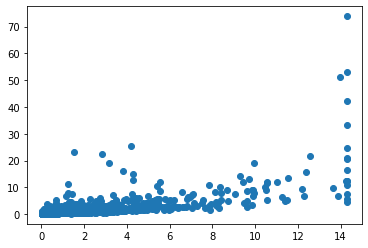

In [272]:
plt.scatter(test_actual,test_predicted)
plt.show()

<AxesSubplot:xlabel='In_creddebt'>

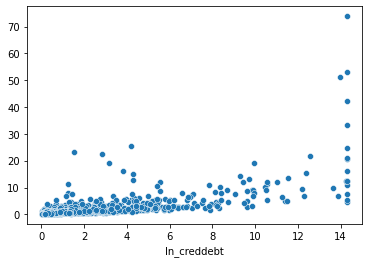

In [273]:
sns.scatterplot(test_actual,test_predicted)

<AxesSubplot:ylabel='Density'>

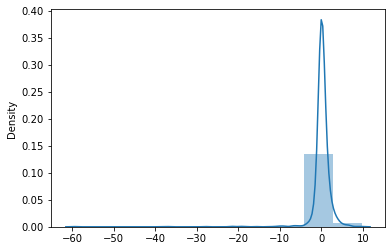

In [274]:
sns.distplot((test_actual-test_predicted),bins=10)

In [275]:
from sklearn import metrics

In [276]:
metrics.explained_variance_score(test_actual,test_predicted)

-0.42538826538642827

In [281]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC

In [278]:
!pip install xgboost

In [282]:
?RandomForestRegressor

In [283]:
final_list_rf=['debtinc',
 'card2tenurecat_2',
 #'pets_freshfish_8',
 'multline_1',
 #'pets_birds_4',
 #'cars_6',
 #'agecat_5',
 'confer_1',
 #'pets_small_2',
 #'reason_3',
 'tollfree_1',
 #'carcatvalue_1',
 #'pets_birds_2',
 'cardten',
 'inccat_3',
 #'cars_4',
 #'pets_dogs_4',
 'default_1',
 'othdebt',
 'owncd_1',
 'card_5',
 'card2spent',
 'agecat_4',
 #'pets_small_3',
 'income',
 'hometype_2',
 'vote_1',
 #'carcatvalue_3',
 'tollten',
 'longmon',
 'homeown_1',
 'voice_1',
 'lnlongmon',
 #'commutenonmotor_1',
 #'carcatvalue_2',
 #'cars_2',
 'ownfax_1',
 #'pets_cats_4',
 'empcat_5',
 #'pets_freshfish_7',
 #'card2tenurecat_5',
 #'polview_7',
 #'cars_5',
 'addresscat_4',
 #'callcard_1',
 #'pets_reptiles_3',
 #'pets_small_4',
 #'edcat_4',
 #'cars_1',
 #'card_4',
 #'card_2',
 'polview_5',
 'lnothdebt',
 #'birthmonth_January',
 #'addresscat_2',
 'cardmon',
 #'card2_5',
 'owntv_1',
 'retire_1',
 'news_1',
 'carown_1',
 'commutemotorcycle_1',
 'ownvcr_1',
 'agecat_3',
 #'pets_freshfish_4',
 'edcat_5',
 'spousedcat_5',
 #'pets_reptiles_2',
 'wireless_1',
 'wireten',
 'wiremon',
 'ownpda_1',
 'owndvd_1',
 #'reason_2',
 'tollmon',
 'pager_1',
 #'inccat_2',
 #'agecat_6',
 #'pets_freshfish_1',
 #'callid_1',
 #'jobsat_5',
 'inccat_4',
 #'cars_3',
 #'inccat_5',
 #'carvalue',
 #'response_03_1',
 #'empcat_2',
 'jobsat_2',
 #'empcat_4',
 #'callwait_1',
 #'pets_birds_3',
 'forward_1',
 'cardspent',
 'employ',
 'carown_0',
 #'pets_freshfish_10',
 'equipten',
 #'jobcat_2'
]

In [284]:
x_train_rf=train[final_list_rf]
y_train_rf=train["In_creddebt"]

In [285]:
x_test_rf=test[final_list_rf]
y_test_rf=test["In_creddebt"]

In [286]:
#Grid search
param_grid={'n_estimators':[50,100,120,150],'max_features':[4,5,6], 'max_depth':[3,4,5,6,7,8], 'max_leaf_nodes':[5,6,7,8,9,10]}
model_rf=GridSearchCV(RandomForestRegressor(), param_grid)

In [287]:
rf = RandomForestRegressor(n_estimators=100)

In [288]:
model_rf.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [4, 5, 6],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10],
                         'n_estimators': [50, 100, 120, 150]})

In [289]:
rf.fit(x_train_rf, y_train_rf)

RandomForestRegressor()

In [290]:
rf.score(x_test_rf, y_test_rf)

0.8670646868196884

In [291]:
rf_pred=rf.predict(x_test_rf)

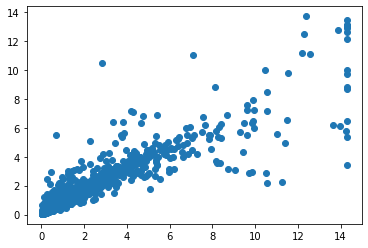

In [292]:
plt.scatter(test_actual,np.exp(rf_pred))
plt.show()

<AxesSubplot:xlabel='In_creddebt'>

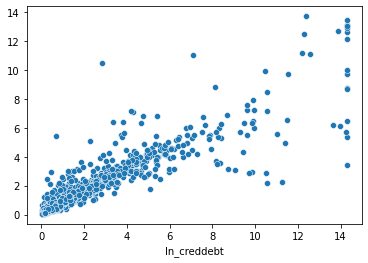

In [293]:
sns.scatterplot(test_actual,np.exp(rf_pred))

<AxesSubplot:xlabel='In_creddebt', ylabel='Density'>

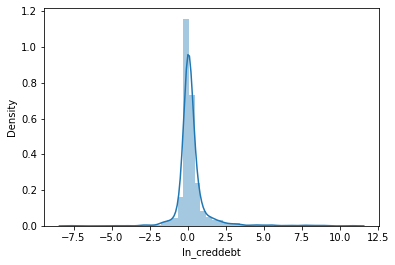

In [294]:
sns.distplot((test_actual-np.exp(rf_pred)),bins=50)

In [295]:
test_actual

2648    0.373730
2456    1.361250
4557    0.090984
4884    0.657536
92      4.133415
          ...   
3014    1.269600
734     0.289892
452     2.216313
2558    0.176946
1927    2.560896
Name: In_creddebt, Length: 1500, dtype: float64

In [296]:
np.exp(rf_pred)

array([0.34939098, 1.37779752, 0.08962319, ..., 1.86009054, 0.13383746,
       2.10810726])

In [297]:

xgb=XGBRegressor()

In [298]:
xgb.fit(x_train_rf, y_train_rf)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [299]:
xgb.score(x_test_rf,y_test_rf)

0.8962152064056049

In [300]:
xgb_pred=xgb.predict(x_test_rf)

In [301]:

metrics.explained_variance_score(test_actual,np.exp(xgb_pred))

0.8283284443611729

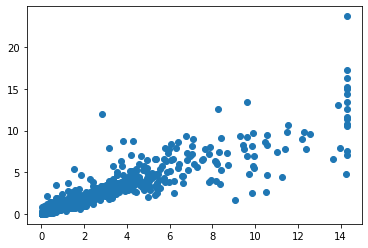

In [302]:
plt.scatter(test_actual,np.exp(xgb_pred))
plt.show()

<AxesSubplot:xlabel='In_creddebt', ylabel='Density'>

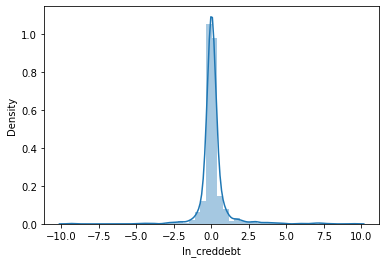

In [303]:
sns.distplot((test_actual-np.exp(xgb_pred)),bins=50)